In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams15.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,NB
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,NB
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,NB
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,NB
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,NB


In [3]:
len(df)

17597

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17597 entries, 0 to 17596
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              17597 non-null  int64  
 1   N_Person           17597 non-null  int64  
 2   Xcenter            17597 non-null  float64
 3   Ycenter            17597 non-null  float64
 4   PerXmin            17597 non-null  float64
 5   PerYmin            17597 non-null  float64
 6   PerXmax            17597 non-null  float64
 7   PerYmax            17597 non-null  float64
 8   N_Handgun          17597 non-null  int64  
 9   HgXcenter          17597 non-null  float64
 10  HgYcenter          17597 non-null  float64
 11  HgXmin             17597 non-null  float64
 12  HgYmin             17597 non-null  float64
 13  HgXmax             17597 non-null  float64
 14  HgYmax             17597 non-null  float64
 15  Intersection       17597 non-null  object 
 16  Included_Center    175

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              13813
Ycenter              13794
PerXmin              13821
PerYmin              13818
PerXmax              13821
PerYmax              13799
N_Handgun                5
HgXcenter             7277
HgYcenter             7275
HgXmin                7279
HgYmin                7279
HgXmax                7279
HgYmax                7278
Intersection             9
Included_Center          2
Intersection_Area     7664
Hg_Area               7279
Distance             17597
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

1    17127
0      470
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,NB,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,NB,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,NB,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,NB,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,NB,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17597 entries, 0 to 17596
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17597 non-null  int64  
 1   N_Person                      17597 non-null  int64  
 2   Xcenter                       17597 non-null  float64
 3   Ycenter                       17597 non-null  float64
 4   PerXmin                       17597 non-null  float64
 5   PerYmin                       17597 non-null  float64
 6   PerXmax                       17597 non-null  float64
 7   PerYmax                       17597 non-null  float64
 8   N_Handgun                     17597 non-null  int64  
 9   HgXcenter                     17597 non-null  float64
 10  HgYcenter                     17597 non-null  float64
 11  HgXmin                        17597 non-null  float64
 12  HgYmin                        17597 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'NB', 0: 'RFC'}


In [10]:
print(df2['Ground_Truth'].value_counts())

1    17127
0      470
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17597 entries, 0 to 17596
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17597 non-null  int64  
 1   N_Person                      17597 non-null  int64  
 2   Xcenter                       17597 non-null  float64
 3   Ycenter                       17597 non-null  float64
 4   PerXmin                       17597 non-null  float64
 5   PerYmin                       17597 non-null  float64
 6   PerXmax                       17597 non-null  float64
 7   PerYmax                       17597 non-null  float64
 8   N_Handgun                     17597 non-null  int64  
 9   HgXcenter                     17597 non-null  float64
 10  HgYcenter                     17597 non-null  float64
 11  HgXmin                        17597 non-null  float64
 12  HgYmin                        17597 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14077, 28) (14077,)
(3520, 28) (3520,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9880340480211875
mean_test =  0.9874268067131873


,fit_time,score_time,test_score,train_score
0,0.081783,0.002990,0.987216,0.987371
1,0.077794,0.002991,0.985085,0.986976
2,0.075801,0.002990,0.984375,0.987529
3,0.080786,0.001992,0.985085,0.986976
4,0.083778,0.001994,0.988636,0.987765
5,0.076773,0.003007,0.987216,0.989581
6,0.086738,0.002992,0.987216,0.987686
7,0.081782,0.002992,0.991471,0.989424
8,0.079785,0.002992,0.992182,0.989661
9,0.092749,0.002992,0.985785,0.987372


In [15]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[3420,    0],
        [  47,   53]],

       [[  53,   47],
        [   0, 3420]]], dtype=int64)

                         feature  importance       std
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
1                       N_Person    0.000038  0.000115
20     Intersection_Center_right    0.000369  0.001106
7                        PerYmax    0.002841  0.005810
23           Intersection_Inside    0.007324  0.021973
12                        HgYmin    0.010131  0.028882
9                      HgXcenter    0.010245  0.016775
10                     HgYcenter    0.013688  0.036229
4                        PerXmin    0.019554  0.046801
13                        HgXmax    0.019738  0.021436
14                        HgYmax    0.022806  0.061265
19      Intersection_Center_left    0.024791  0.045459
0                          Frame    0.025230  0.046511
18        

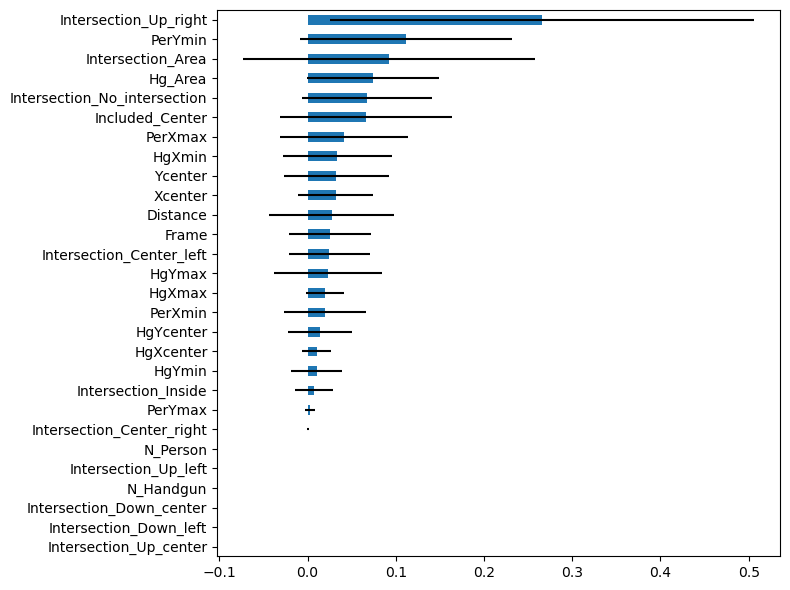

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       100
           1       0.99      1.00      0.99      3420

    accuracy                           0.99      3520
   macro avg       0.99      0.77      0.84      3520
weighted avg       0.99      0.99      0.98      3520



In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17597 entries, 0 to 17596
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17597 non-null  int64  
 1   N_Person                      17597 non-null  int64  
 2   Xcenter                       17597 non-null  float64
 3   Ycenter                       17597 non-null  float64
 4   PerXmin                       17597 non-null  float64
 5   PerYmin                       17597 non-null  float64
 6   PerXmax                       17597 non-null  float64
 7   PerYmax                       17597 non-null  float64
 8   N_Handgun                     17597 non-null  int64  
 9   HgXcenter                     17597 non-null  float64
 10  HgYcenter                     17597 non-null  float64
 11  HgXmin                        17597 non-null  float64
 12  HgYmin                        17597 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.82857443e+00, -1.00224636e+00,  3.89692306e-01,
        -1.04520147e+00,  4.05513177e-01, -7.96387317e-01,
         3.58754206e-01, -1.39614087e+00, -4.89138114e-01,
         6.88771564e-01, -1.24583366e+00,  7.38942645e-01,
        -1.17057846e+00,  6.36943004e-01, -1.31670521e+00,
         1.24140365e+00,  3.66833980e-03, -6.24194447e-01,
        -7.39021610e-01,  2.74028970e+00, -2.82434564e-01,
        -1.68588285e-02, -1.06615504e-02, -5.27800138e-01,
        -1.13857768e+00, -8.59356297e-02, -5.94624720e-02,
        -1.23176675e-01],
       [-1.82643442e+00, -1.00224636e+00,  3.89410637e-01,
        -1.04461391e+00,  4.04546334e-01, -7.94698645e-01,
         3.59194790e-01, -1.39885661e+00, -4.89138114e-01,
         6.87165984e-01, -1.24668247e+00,  7.35926031e-01,
        -1.17122697e+00,  6.36740385e-01, -1.31775592e+00,
         1.24140365e+00,  6.22316644e-03, -6.17995907e-01,
        -7.37597412e-01,  2.74028970e+00, -2.82434564e-01,
        -1.68588285e-02, -1.06

In [22]:
print(scaler.mean_)

[8.54468887e+02 8.73728476e-01 3.91147693e+02 3.81839730e+02
 3.04806678e+02 2.45526782e+02 4.77488709e+02 5.18152679e+02
 2.88912883e-01 3.05227659e+02 3.11927308e+02 2.82133965e+02
 2.92680814e+02 3.28321353e+02 3.31173803e+02 3.93532989e-01
 8.39142091e+02 1.95754804e+03 2.38001812e+02 1.17520032e-01
 7.38762289e-02 2.84139342e-04 1.13655737e-04 2.17878047e-01
 5.64528045e-01 7.33079502e-03 3.52332784e-03 1.49457294e-02]


In [23]:
print(scaler.scale_)

[4.67286904e+02 8.71770163e-01 2.15174269e+02 6.91319193e+01
 2.23348038e+02 1.11910442e+02 2.15002196e+02 3.96732960e+01
 5.90657065e-01 1.51943452e+02 9.78295527e+01 1.51473742e+02
 9.95791753e+01 1.52883774e+02 9.65998022e+01 4.88533290e-01
 1.57649163e+03 1.72388559e+03 1.37859189e+02 3.22038932e-01
 2.61569363e-01 1.68540383e-02 1.06603386e-02 4.12804074e-01
 4.95818648e-01 8.53056532e-02 5.92529662e-02 1.21335710e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13197, 28)

In [26]:
y_train.value_counts()

1    12845
0      352
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4400, 28)

In [28]:
y_test.value_counts()

1    4282
0     118
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[0.00000000e+00, 1.00000000e+00],
       [9.99998648e-01, 1.35236934e-06],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[4281,    1],
        [   3,  115]],

       [[ 115,    3],
        [   1, 4281]]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       118
           1       1.00      1.00      1.00      4282

    accuracy                           1.00      4400
   macro avg       1.00      0.99      0.99      4400
weighted avg       1.00      1.00      1.00      4400



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9993180268242783
Score test =  0.9990909090909091


In [33]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  1.0
Score test =  0.9626700411262259


In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))